In [195]:
import os
import pandas as pd
import sklearn 
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [196]:
#importing all the assiting functions for this

from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler

In [197]:
#import all the models that well use in this research

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [198]:
#import metrics for evaluation

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    make_scorer,
)

In [199]:
#download data from kagglehub


#download_path= kaggle.api.dataset_download_files(
#        dataset_name,
#         path=download_path,
#         unzip=True)

In [200]:
download_path = './machine failure.csv'
df= pd.read_csv(download_path)

In [201]:
df.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [202]:
#lets explore the data

print (f'Number of data points is: {df.shape[0]} | each data point has {df.shape[1] - 2} features')
print(f'features names in this research: {df.columns[1:]}')
df.info()

Number of data points is: 10000 | each data point has 12 features
features names in this research: Index(['Product ID', 'Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure   

In [203]:
#lets better understand the features
print(f'Number of unique data entries: {len(df["Product ID"].value_counts())}')

#drop the column
df= df.drop(['UDI','Product ID'],axis=1)

Number of unique data entries: 10000


from the kaggle page we get the following: 
the label is under the column: Machine_failure
TWF | HDF | PWF | OSF | RNF - methods of failure

In [204]:
#lets better understand the values of the categorical 
for column in df.columns:
    if column not in ['UDI','Air_temp','Process_temp','Torque']:
        unique= df[column].unique()
        print(f'Column: {column} has {len(unique)} values: {unique}')
    

Column: Type has 3 values: ['M' 'L' 'H']
Column: Air temperature [K] has 93 values: [298.1 298.2 298.3 298.5 298.4 298.6 298.7 298.8 298.9 299.  299.1 298.
 297.9 297.8 297.7 297.6 297.5 297.4 297.3 297.2 297.1 297.  296.9 296.8
 296.7 296.6 296.5 296.3 296.4 296.2 296.1 296.  295.9 295.8 295.7 295.6
 295.5 295.4 295.3 299.2 299.3 299.5 299.4 299.6 299.7 299.8 299.9 300.
 300.1 300.2 300.3 300.4 300.5 300.6 300.7 300.8 300.9 301.  301.1 301.2
 301.3 301.4 301.5 301.6 301.7 301.8 301.9 302.  302.1 302.2 302.3 302.4
 302.5 302.6 302.7 302.8 302.9 303.  303.1 303.2 303.3 303.4 303.5 303.6
 303.7 303.8 303.9 304.  304.1 304.2 304.3 304.4 304.5]
Column: Process temperature [K] has 82 values: [308.6 308.7 308.5 309.  308.9 309.1 309.2 309.3 309.4 309.5 308.8 308.4
 308.3 308.2 308.1 308.  307.9 309.6 309.7 309.8 309.9 310.  310.1 310.2
 307.8 307.7 307.6 307.5 307.4 307.3 307.2 307.1 307.  306.9 306.8 306.7
 306.6 306.5 306.4 306.3 306.2 306.1 306.  305.9 305.8 305.7 310.3 310.4
 310.5 310.6

In [205]:
#lets change the name of the columns such that it will be easier to work with

df = df.rename(columns={'Product ID': 'Product_ID','Air temperature [K]': 'Air_temp', 'Process temperature [K]': 'Process_temp',
                            'Rotational speed [rpm]': 'Rotational_speed', 'Tool wear [min]': 'Tool_wear', 'Machine failure': 'Machine_failure',
                            'Torque [Nm]': 'Torque'})


In [206]:
# some statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air_temp,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process_temp,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational_speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine_failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [207]:
df.isnull().sum()

Type                0
Air_temp            0
Process_temp        0
Rotational_speed    0
Torque              0
Tool_wear           0
Machine_failure     0
TWF                 0
HDF                 0
PWF                 0
OSF                 0
RNF                 0
dtype: int64

to conclude - 10k data points with no nulls

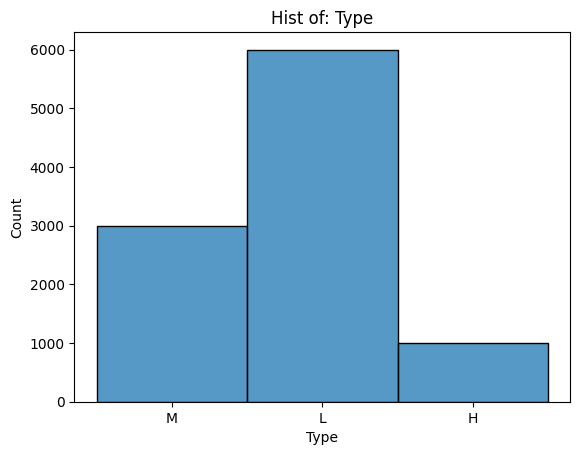

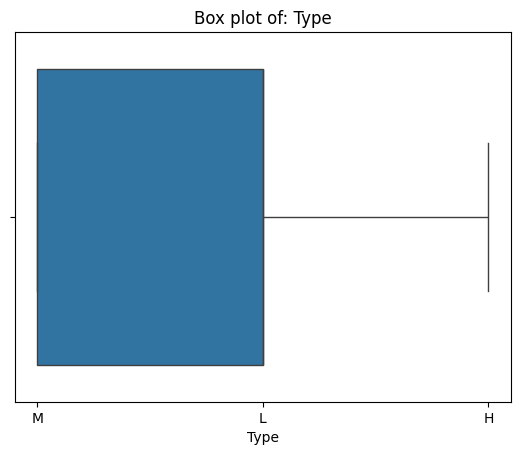

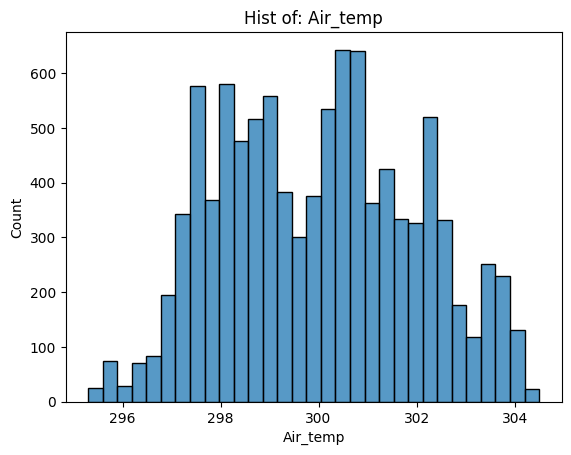

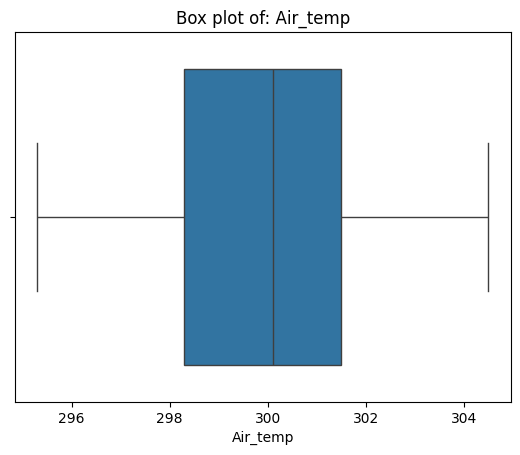

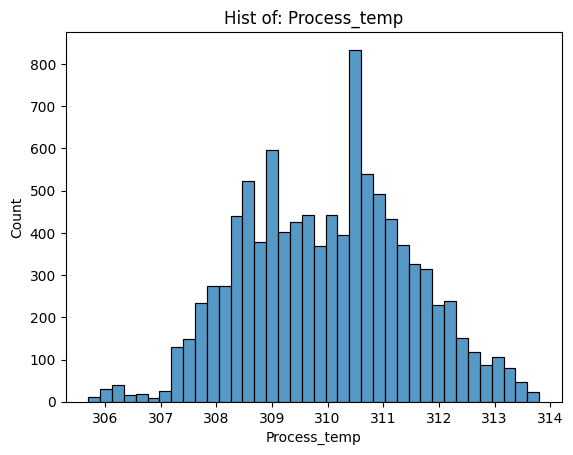

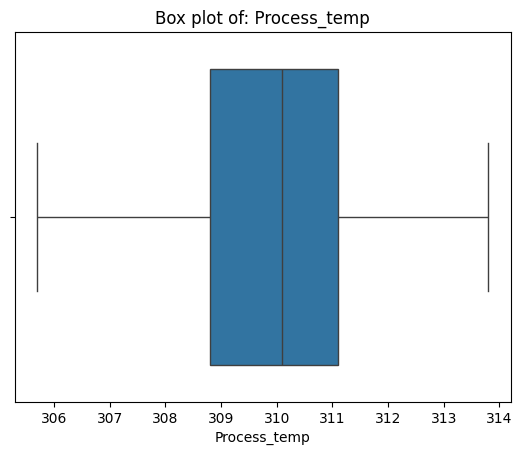

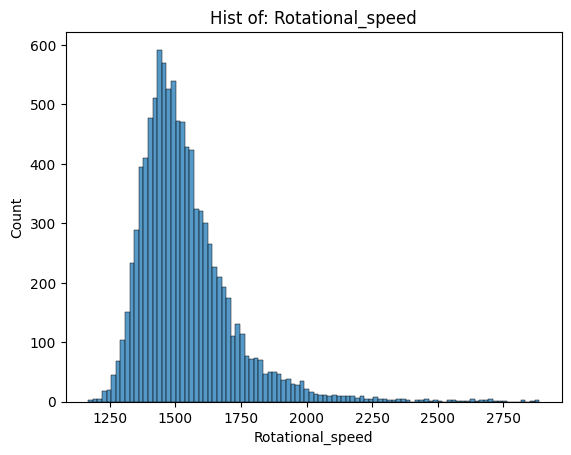

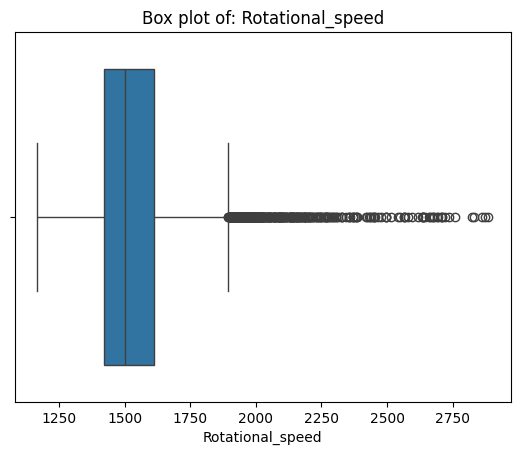

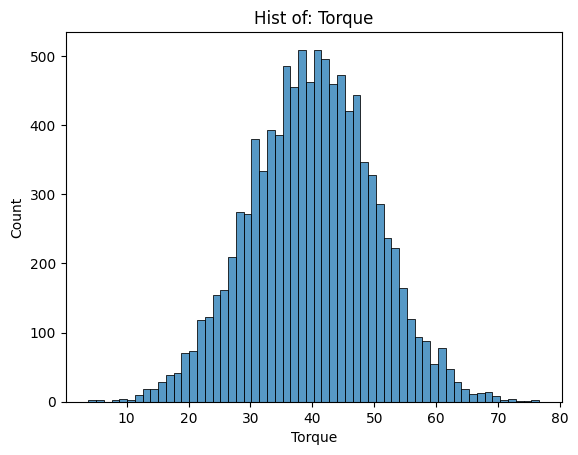

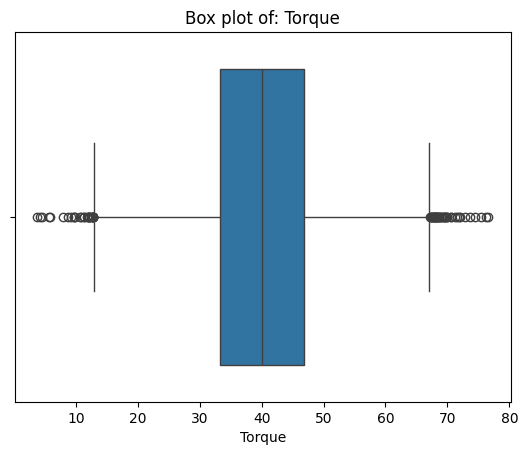

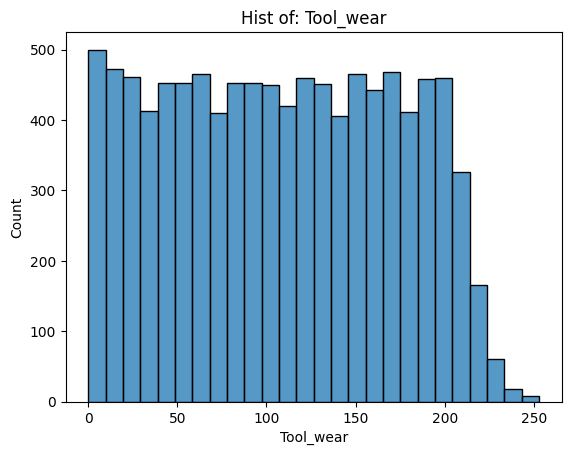

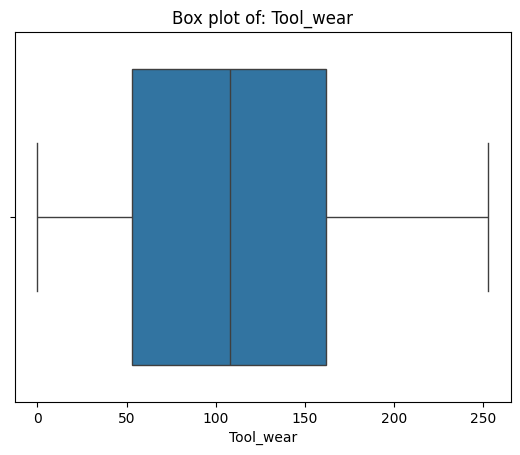

In [208]:
#lets see some figures of the data
feature_cols= ['Type', 'Air_temp', 'Process_temp', 'Rotational_speed', 'Torque','Tool_wear']

for col in feature_cols:
    sns.histplot(data=df, x=col).set_title(f'Hist of: {col}')
    plt.show()
    sns.boxplot(data=df,x=col).set_title(f'Box plot of: {col}')
    plt.show()

observations:
1. Type - unbalanced feature with relative 6:3:1 distribution of values
2. Air_temp - fairly normal
3. Process_temp - fairly normal
4. Rotational_speed - skewed due to long tail of high values
5. Torque - fairly normal
6. Tool_wear - uniformly distributed

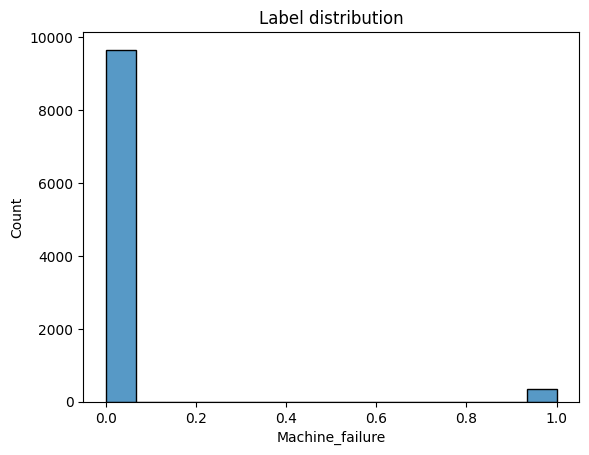

Machine_failure
0    9661
1     339
Name: count, dtype: int64

In [209]:
#lets see the label distribution
sns.histplot(data=df,x="Machine_failure").set_title('Label distribution')
plt.show()

df['Machine_failure'].value_counts()

this is a highly unbalanced dataset (as expected in these sort of setups)

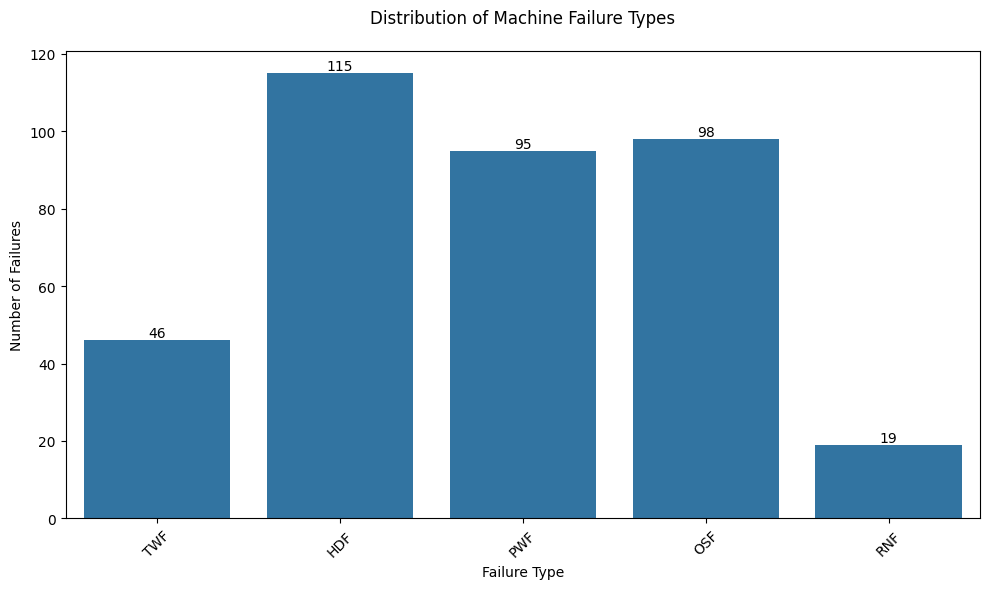


Numerical distribution of failure types:
TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64

Percentage of each failure type:
TWF    13.57
HDF    33.92
PWF    28.02
OSF    28.91
RNF     5.60
dtype: float64


In [210]:
# Get the sum of each failure type
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum()

# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=failure_counts.index, y=failure_counts.values)

# Customize the plot
plt.title('Distribution of Machine Failure Types', pad=20)
plt.xlabel('Failure Type')
plt.ylabel('Number of Failures')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(failure_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print the numerical distribution as well
print("\nNumerical distribution of failure types:")
print(failure_counts)

# Calculate percentages
total_failures = df['Machine_failure'].sum()
percentages = (failure_counts / total_failures * 100).round(2)
print("\nPercentage of each failure type:")
print(percentages)


In [211]:
#lets see the baseline without any work done on the data
data= df.copy()
data = data.drop(failure_types,axis=1)

X= data.drop(["Machine_failure"],axis=1)
y= df['Machine_failure']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 6) (2000, 6) (2000, 6)


In [212]:
for ds_name,ds in zip(['train','test','validation'],[y_train,y_test,y_val]):
    print(f'Distribution of labels per {ds_name} set')
    print(ds.value_counts())

Distribution of labels per train set
Machine_failure
0    5797
1     203
Name: count, dtype: int64
Distribution of labels per test set
Machine_failure
0    1932
1      68
Name: count, dtype: int64
Distribution of labels per validation set
Machine_failure
0    1932
1      68
Name: count, dtype: int64


In [213]:
numeric_cols = ['Air_temp', 'Process_temp', 'Rotational_speed', 'Torque', 'Tool_wear']
categorical_cols = ['Type']


# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Preprocessing steps for numeric columns:
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [214]:
#start with knn
knn_pipeline= make_pipeline(preprocessor, KNeighborsClassifier(n_neighbors=2))
knn_pipeline.fit(X_train,y_train)
knn_val_preds= knn_pipeline.predict(X_val)

In [215]:
#lets see some evaluation metrics
print(f'KNN Evaluation Stats:\n')
print(f'Accuracy: {accuracy_score(y_val,knn_val_preds)} | Percision: {precision_score(y_val,knn_val_preds)} | Recall: {recall_score(y_val,knn_val_preds)}')

KNN Evaluation Stats:

Accuracy: 0.972 | Percision: 0.875 | Recall: 0.20588235294117646


In [216]:
#DecisionTreeClassifier

desc_tree_pipeline= make_pipeline(preprocessor,DecisionTreeClassifier())
desc_tree_pipeline.fit(X_train,y_train)
desc_tree_preds= desc_tree_pipeline.predict(X_val)

In [217]:
#lets see some evaluation metrics
print(f'DecisionTreeClassifier Evaluation Stats:\n')
print(f'Accuracy: {accuracy_score(y_val,desc_tree_preds)} | Percision: {precision_score(y_val,desc_tree_preds)} | Recall: {recall_score(y_val,desc_tree_preds)}')

DecisionTreeClassifier Evaluation Stats:

Accuracy: 0.979 | Percision: 0.7166666666666667 | Recall: 0.6323529411764706


In [218]:
#lets better understand the values of the categorical 
for column in df.columns:
    if column not in ['UDI','Air_temp','Process_temp','Torque']:
        unique= df[column].unique()
        print(f'Column: {column} has {len(unique)} values: {unique}')
    

Column: Type has 3 values: ['M' 'L' 'H']
Column: Rotational_speed has 941 values: [1551 1408 1498 1433 1425 1558 1527 1667 1741 1782 1423 1339 1742 2035
 1542 1311 1410 1306 1632 1375 1450 1581 1758 1561 1861 1512 1811 1439
 1693 1798 1419 1665 1559 1452 1379 1350 1362 1368 1372 1472 1489 1843
 1418 1412 2861 1383 1497 1565 1691 1477 1513 1661 1378 1393 1592 1829
 1812 1523 1394 1679 1466 1924 1369 1601 1461 1455 1398 1402 1445 1453
 1469 1422 1804 1436 1544 1487 1753 1830 1727 1622 1351 1575 1750 1529
 1852 1991 1555 1441 1591 1621 1572 1872 1499 1486 1680 1431 1564 1599
 1707 1467 1310 1546 1560 1329 1413 1587 1473 1737 1430 1711 1420 1297
 1449 1268 1511 1778 1407 1391 1612 1515 1463 1584 1850 1528 1987 1495
 1478 1471 1282 1586 1468 1440 1733 1458 1318 1610 1462 1382 1618 1988
 1304 1475 1824 1342 1485 1446 1301 1606 1539 1666 1678 2678 1432 1588
 1609 1636 1490 1344 1421 1386 1589 1548 1664 1447 1434 1416 1827 1569
 1629 1538 1570 1424 1552 1611 1777 1348 1442 1395 1627 1585 1405 

In [219]:
#lets change the name of the columns such that it will be easier to work with

df = df.rename(columns={'Product ID': 'Product_ID','Air temperature [K]': 'Air_temp', 'Process temperature [K]': 'Process_temp',
                            'Rotational speed [rpm]': 'Rotational_speed', 'Tool wear [min]': 'Tool_wear', 'Machine failure': 'Machine_failure',
                            'Torque [Nm]': 'Torque'})


In [220]:
# some statistics of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Air_temp,10000.0,300.00493,2.000259,295.3,298.3,300.1,301.5,304.5
Process_temp,10000.0,310.00556,1.483734,305.7,308.8,310.1,311.1,313.8
Rotational_speed,10000.0,1538.77610,179.284096,1168.0,1423.0,1503.0,1612.0,2886.0
Torque,10000.0,39.98691,9.968934,3.8,33.2,40.1,46.8,76.6
Tool_wear,10000.0,107.95100,63.654147,0.0,53.0,108.0,162.0,253.0
Machine_failure,10000.0,0.03390,0.180981,0.0,0.0,0.0,0.0,1.0
TWF,10000.0,0.00460,0.067671,0.0,0.0,0.0,0.0,1.0
HDF,10000.0,0.01150,0.106625,0.0,0.0,0.0,0.0,1.0
PWF,10000.0,0.00950,0.097009,0.0,0.0,0.0,0.0,1.0
OSF,10000.0,0.00980,0.098514,0.0,0.0,0.0,0.0,1.0


In [221]:
df.isnull().sum()

Type                0
Air_temp            0
Process_temp        0
Rotational_speed    0
Torque              0
Tool_wear           0
Machine_failure     0
TWF                 0
HDF                 0
PWF                 0
OSF                 0
RNF                 0
dtype: int64

to conclude - 10k data points with no nulls

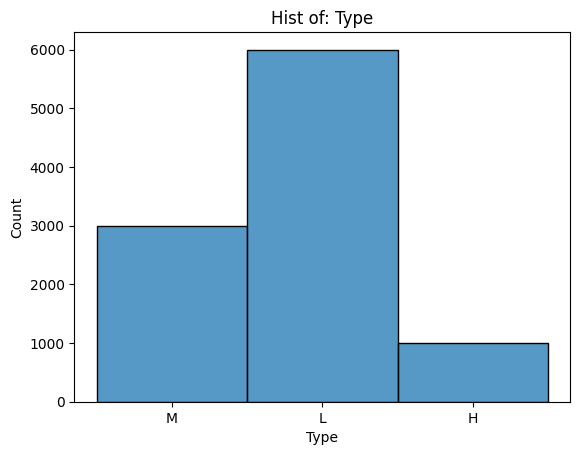

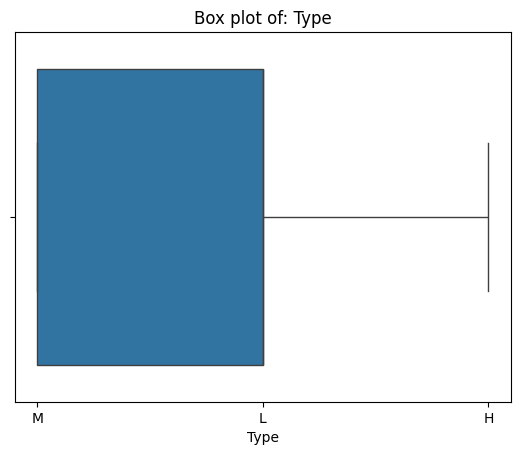

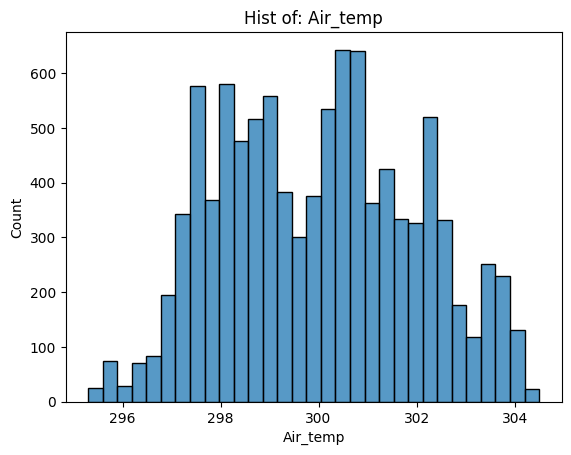

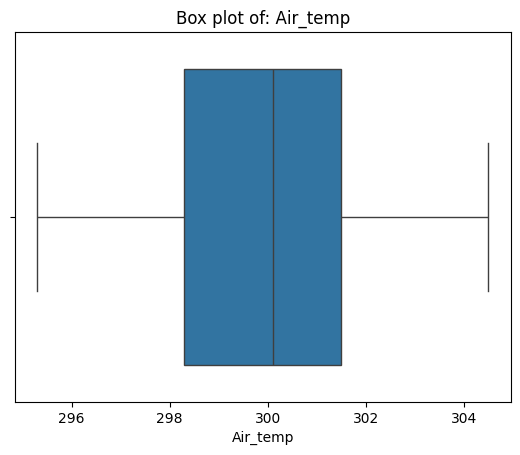

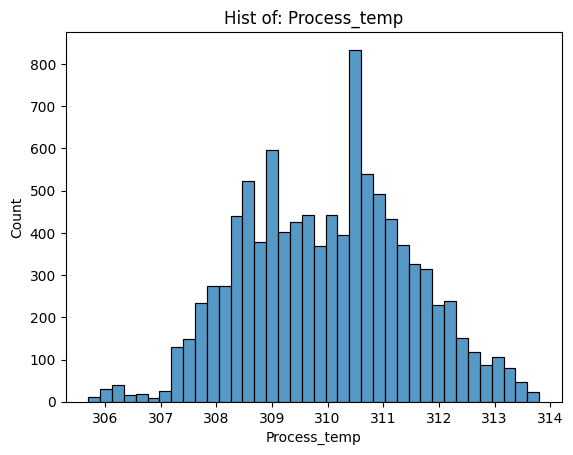

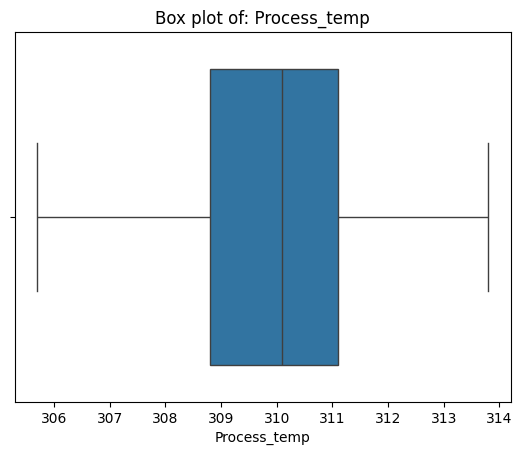

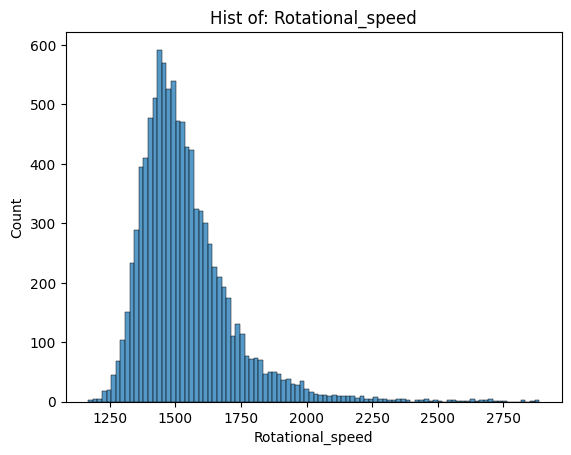

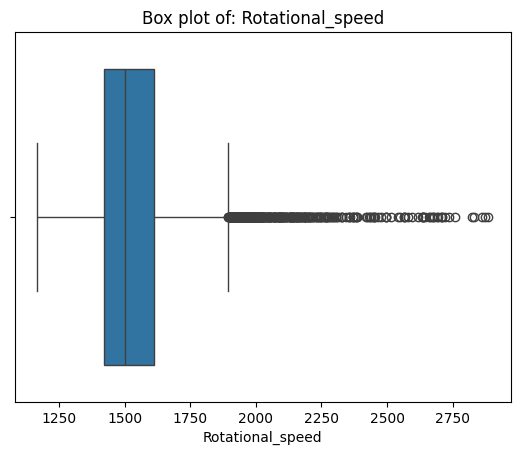

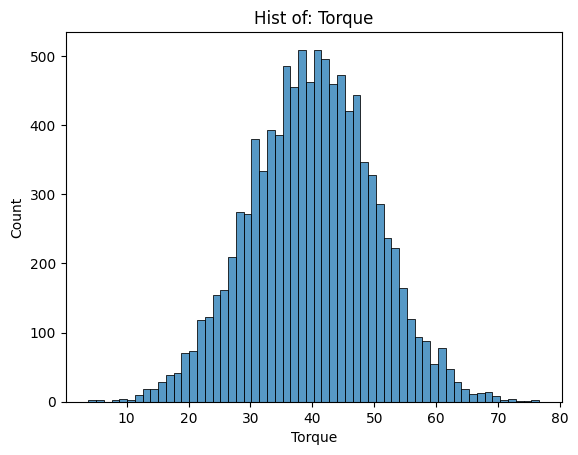

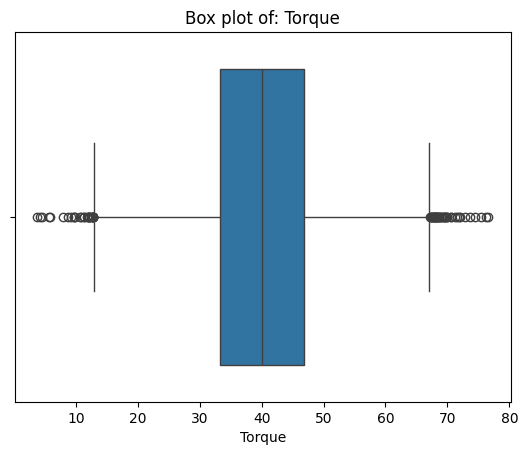

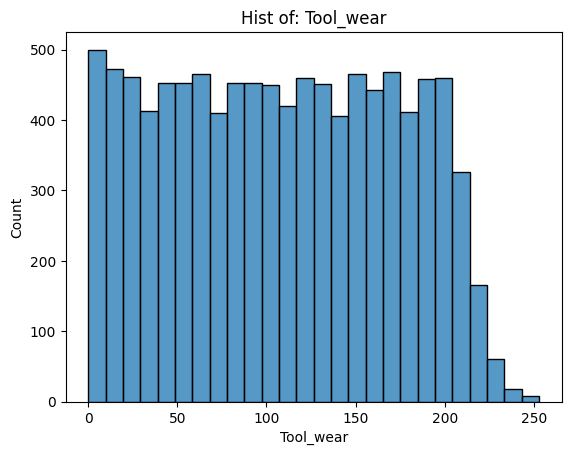

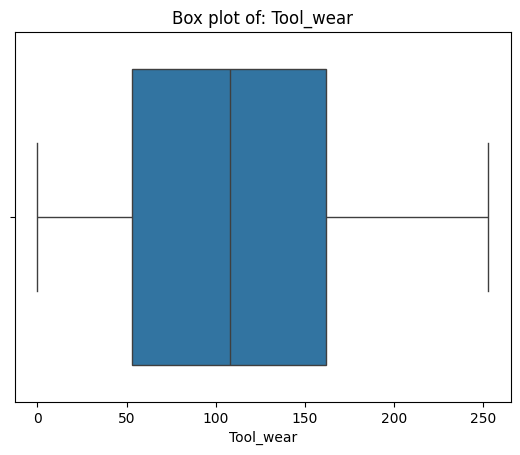

In [222]:
#lets see some figures of the data
feature_cols= ['Type', 'Air_temp', 'Process_temp', 'Rotational_speed', 'Torque','Tool_wear']

for col in feature_cols:
    sns.histplot(data=df, x=col).set_title(f'Hist of: {col}')
    plt.show()
    sns.boxplot(data=df,x=col).set_title(f'Box plot of: {col}')
    plt.show()

observations:
1. Type - unbalanced feature with relative 6:3:1 distribution of values
2. Air_temp - fairly normal
3. Process_temp - fairly normal
4. Rotational_speed - skewed due to long tail of high values
5. Torque - fairly normal
6. Tool_wear - uniformly distributed

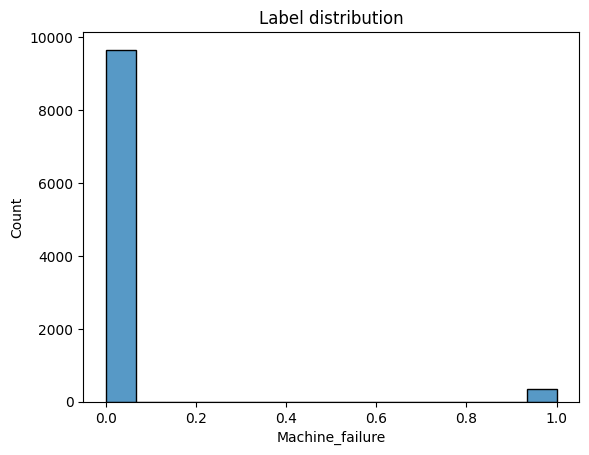

Machine_failure
0    9661
1     339
Name: count, dtype: int64

In [223]:
#lets see the label distribution
sns.histplot(data=df,x="Machine_failure").set_title('Label distribution')
plt.show()

df['Machine_failure'].value_counts()

this is a highly unbalanced dataset (as expected in these sort of setups)

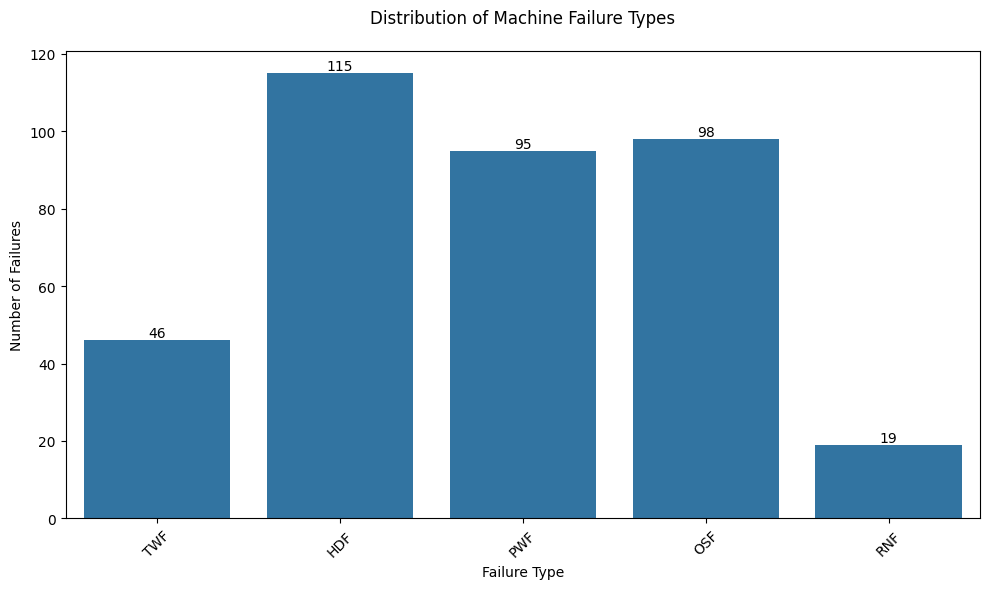


Numerical distribution of failure types:
TWF     46
HDF    115
PWF     95
OSF     98
RNF     19
dtype: int64

Percentage of each failure type:
TWF    13.57
HDF    33.92
PWF    28.02
OSF    28.91
RNF     5.60
dtype: float64


In [224]:
# Get the sum of each failure type
failure_types = ['TWF', 'HDF', 'PWF', 'OSF', 'RNF']
failure_counts = df[failure_types].sum()

# Create a figure with appropriate size
plt.figure(figsize=(10, 6))

# Create bar plot
sns.barplot(x=failure_counts.index, y=failure_counts.values)

# Customize the plot
plt.title('Distribution of Machine Failure Types', pad=20)
plt.xlabel('Failure Type')
plt.ylabel('Number of Failures')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add value labels on top of each bar
for i, v in enumerate(failure_counts.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

# Adjust layout to prevent label cutoff
plt.tight_layout()

plt.show()

# Print the numerical distribution as well
print("\nNumerical distribution of failure types:")
print(failure_counts)

# Calculate percentages
total_failures = df['Machine_failure'].sum()
percentages = (failure_counts / total_failures * 100).round(2)
print("\nPercentage of each failure type:")
print(percentages)


In [225]:
#lets see the baseline without any work done on the data
data= df.copy()
data = data.drop(failure_types,axis=1)

X= data.drop(["Machine_failure"],axis=1)
y= df['Machine_failure']

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 6) (2000, 6) (2000, 6)


In [226]:
for ds_name,ds in zip(['train','test','validation'],[y_train,y_test,y_val]):
    print(f'Distribution of labels per {ds_name} set')
    print(ds.value_counts())

Distribution of labels per train set
Machine_failure
0    5797
1     203
Name: count, dtype: int64
Distribution of labels per test set
Machine_failure
0    1932
1      68
Name: count, dtype: int64
Distribution of labels per validation set
Machine_failure
0    1932
1      68
Name: count, dtype: int64


In [227]:
numeric_cols = ['Air_temp', 'Process_temp', 'Rotational_speed', 'Torque', 'Tool_wear']
categorical_cols = ['Type']


# Preprocessing steps for categorical columns:
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) 
])

# Preprocessing steps for numeric columns:
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [228]:
#lets create an expirimental system that takes in training and validation set and compares the prformance of these classifiers on the data

xgb_model_param = {
        'n_estimators': 2500,
        'learning_rate': 0.1,
        'max_depth': 6,
    }


def run_exp(x_t,y_t,x_v,y_v,n_neighbors=2,xgb_param=xgb_model_param):

    models = {
        'knn': KNeighborsClassifier(n_neighbors=n_neighbors),
        'decision_tree': DecisionTreeClassifier(),
        'xgb': GradientBoostingClassifier(**xgb_param)
    }
    
    # Store individual model predictions and pipelines
    model_predictions = {}
    fitted_pipelines = {}
    
    rows=[]
    for model_name, model in models.items():
        pipeline_ = make_pipeline(preprocessor, model)
        pipeline_.fit(x_t, y_t)
        fitted_pipelines[model_name] = pipeline_
        model_predictions[model_name] = pipeline_.predict(x_v)

        
        temp_dict= {'classifier_name':model_name,'Accuracy':accuracy_score(y_v,model_predictions[model_name]),
                        'Persicision':precision_score(y_v,model_predictions[model_name]),'Recall':recall_score(y_v,model_predictions[model_name]),
                        'F1-score':f1_score(y_v,model_predictions[model_name])}
        
        rows.append(temp_dict)

    df_score = pd.DataFrame(rows)               
    print(df_score)

run_exp(x_t=X_train,y_t=y_train,x_v=X_val,y_v=y_val)

  classifier_name  Accuracy  Persicision    Recall  F1-score
0             knn    0.9720     0.875000  0.205882  0.333333
1   decision_tree    0.9780     0.671429  0.691176  0.681159
2             xgb    0.9845     0.951220  0.573529  0.715596


we can see that xgboost classifier produces the best overall performance on the baseline.
interpation to the results (xgb): the percision score is not bad - this means that the amount of false positives is only ~10% i.e. when the classifier indicates a possible malfunction it is mostly correct. however, the classifier can improve its detection rate as it misses ~33%. 
(this is obviously dependant on the data split)
note: to get a complete baseline analysis we should perform Cross Validation split of the ds. for now lets try to improve on the baseline.

In [229]:
#id like to see whether the rotational speed high tail can be shortened and if that affects the classifier performance
processed_data= df.copy()

#test correlation of tail with failure
print(df[['Rotational_speed','Machine_failure']])

      Rotational_speed  Machine_failure
0                 1551                0
1                 1408                0
2                 1498                0
3                 1433                0
4                 1408                0
...                ...              ...
9995              1604                0
9996              1632                0
9997              1645                0
9998              1408                0
9999              1500                0

[10000 rows x 2 columns]


In [230]:
#take the 0.9 quantile
threshold = processed_data['Rotational_speed'].quantile(0.9)

top_df= processed_data[processed_data['Rotational_speed'] >= threshold]
num_failures= processed_data['Machine_failure'].sum()
top_failures= top_df['Machine_failure'].sum()


print(f'The high tail holds {100*(top_failures/num_failures)}% of the failures with as much as {100*len(top_df)/len(df)}% values')
#0.9 was the balance that got the same % for the 2 failures and values.

The high tail holds 10.914454277286136% of the failures with as much as 10.02% values


In [231]:
new_improved_df= processed_data[processed_data['Rotational_speed'] <= threshold]

X= new_improved_df.drop(["Machine_failure"],axis=1)
y= new_improved_df['Machine_failure']

X_temp, new_X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
new_X_train, new_X_val, new_y_train, new_y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)


In [232]:
new_X_train.shape,new_y_train.shape,new_X_val.shape,new_y_val.shape

((5401, 11), (5401,), (1801, 11), (1801,))

In [233]:
run_exp(x_t= new_X_train,y_t=new_y_train,x_v=new_X_val,y_v=new_y_val)

  classifier_name  Accuracy  Persicision    Recall  F1-score
0             knn  0.973348     0.933333  0.229508  0.368421
1   decision_tree  0.974459     0.619048  0.639344  0.629032
2             xgb  0.984453     0.836735  0.672131  0.745455


this has improved the overall stats a bit - better recall mostly. this is expected as we lost some of the edge cases.
overall - IT IS NOT RECOMMENDED TO DISCARD SUCH DATA (AND DATA AT ALL) as this edge cases carry a lot of information that can help the model generalize better. 

#finally - lets try to combine the predictions of all the models to create n ensamble. well use majority vote to decide on the final prediction


In [235]:
#lets change the run_exp function

def run_ensemble_exp(x_t, y_t, x_v, y_v, n_neighbors=2, xgb_param=xgb_model_param):
    
    models = {
        'knn': KNeighborsClassifier(n_neighbors=n_neighbors),
        'decision_tree': DecisionTreeClassifier(),
        'xgb': GradientBoostingClassifier(**xgb_param)
    }
    

    model_predictions = {}
    fitted_pipelines = {}
    rows=[]
    for model_name, model in models.items():
        pipeline_ = make_pipeline(preprocessor, model)
        pipeline_.fit(x_t, y_t)
        fitted_pipelines[model_name] = pipeline_
        model_predictions[model_name] = pipeline_.predict(x_v)
    
    predictions_array = np.array(list(model_predictions.values()))
    
    ensemble_predictions = np.apply_along_axis(
        lambda x: np.bincount(x).argmax(), 
        axis=0, 
        arr=predictions_array
    )
    
    # Add ensemble results
    ensemble_metrics = {
        'classifier_name': 'ensemble',
        'Accuracy': accuracy_score(y_v, ensemble_predictions),
        'Precision': precision_score(y_v, ensemble_predictions),
        'Recall': recall_score(y_v, ensemble_predictions),
        'F1-score': f1_score(y_v, ensemble_predictions)
    }
    rows.append(ensemble_metrics)
    
    df_score = pd.DataFrame(rows)
    print(df_score)
    
run_ensemble_exp(x_t=X_train,y_t=y_train,x_v=X_val,y_v=y_val)

  classifier_name  Accuracy  Precision    Recall  F1-score
0        ensemble    0.9835   0.926829  0.558824  0.697248


looks as though the ensemble did not improve the results